## Question Answering

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tqdm.pandas()
pd.set_option('display.max_colwidth', 150)
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_parquet('dados/desc_topics.parquet')
df.shape

(3452, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Document                 3452 non-null   object 
 1   Topic                    3452 non-null   int64  
 2   Name                     3452 non-null   object 
 3   Top_n_words              3452 non-null   object 
 4   Probability              3452 non-null   float64
 5   Representative_document  3452 non-null   bool   
 6   desc                     3452 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 192.2+ KB


#### Tópicos com mais empresas

In [4]:
df['Name'].value_counts()[:10]

0_health_care_healthcare_medical            1264
-1_data_read_platform_company                867
1_security_data_cloud_risk                   276
2_payments_payment_financial_businesses      126
3_insurance_claims_underwriting_insurers      87
4_ai_learning_intelligence_business           64
5_logistics_freight_fulfillment_shipping      64
6_retailers_retail_commerce_store             61
7_training_learning_workforce_workers         56
9_video_tv_streaming_radio                    41
Name: Name, dtype: int64

#### Empresas envolvidas com Inteligência Artificial

In [5]:
df_ml = df[df['Topic'] == 4]
df_ml.shape

(64, 7)

In [21]:
df_ml[['desc', 'Probability']].head()

,desc,Probability
11,"Skan.ai uses cognitive technologies to map, model, and manage business processes by creating digital twins of human/digital interactions. Skan.ai ...",0.814415
465,DeepSig is an early-stage startup that develops deep learning software to reinvent wireless communications. By replacing core wireless technology ...,0.793050
508,"Graphcore is a startup that develops a microprocessor designed for AI and machine learning applications. It has created a new processor, the Intel...",1.000000
551,Syntiant is moving artificial intelligence and machine learning from the cloud to edge devices. Syntiant’s advanced chip solutions merge deep lear...,0.896949
553,AI21 Labs specializes in developing AI systems with an unprecedented capacity to understand and generate natural language. AI21 Labs was co-founde...,0.822778


In [22]:
df_ml['Probability'].describe()

count    64.000000
mean      0.902791
std       0.072346
min       0.793050
25%       0.837425
50%       0.894372
75%       0.971484
max       1.000000
Name: Probability, dtype: float64

### Extração do nome das empresas

In [8]:
qa_model = pipeline('question-answering', model='bert-large-uncased-whole-word-masking-finetuned-squad')

In [60]:
def get_company_name(desc):
    question = 'What is the company name?'
    answer = qa_model(question=question, context=desc)
    return answer['answer']

In [61]:
# Teste
desc = df['desc'].loc[1626]
print('Descrição:', desc)
print('Nome da empresa:', get_company_name(desc))

Descrição: Defined.ai is enabling AI creators of the future, from those building their first boot-strapped models, to those fine-tuning complex AI projects. Defined.ai hosts the leading online marketplace where it's possible to buy, sell or commission off-the-shelf or custom-ordered AI data, tools and models, and offers professional services to helpdeliver success in complex machine learning projects. Defined.ai is a community of AI professionals working together to build fair, accessible, inclusive and ethical AI of the future.Read More
Nome da empresa: Defined.ai


#### Extrai nome das empresas de inteligência artificial

In [62]:
df_ml['company_name'] = df_ml['desc'].progress_apply(get_company_name)

100%|██████████| 64/64 [01:35<00:00,  1.49s/it]


In [63]:
df_ml[['desc', 'company_name']].head(10)

,desc,company_name
11,"Skan.ai uses cognitive technologies to map, model, and manage business processes by creating digital twins of human/digital interactions. Skan.ai ...",Skan.ai
465,DeepSig is an early-stage startup that develops deep learning software to reinvent wireless communications. By replacing core wireless technology ...,DeepSig
508,"Graphcore is a startup that develops a microprocessor designed for AI and machine learning applications. It has created a new processor, the Intel...",Graphcore
551,Syntiant is moving artificial intelligence and machine learning from the cloud to edge devices. Syntiant’s advanced chip solutions merge deep lear...,Syntiant
553,AI21 Labs specializes in developing AI systems with an unprecedented capacity to understand and generate natural language. AI21 Labs was co-founde...,AI21 Labs
581,"Beyond Limits is an Industrial and Enterprise-grade AI technology company that covers the full range of Artificial Intelligence, purpose-built for...",Beyond Limits
601,"Noodle.ai offers pioneering business solutions in Enterprise Artificial Intelligence, a unique collaboration among business executives, process ex...",Noodle.ai
659,Explosion is a software company specializing in developer tools for Artificial Intelligence and Natural Language Processing.,Explosion
665,Tenstorrent is enabling a new era in AI and deep learning with its breakthrough processor architecture and software. The company’s mission is to d...,Tenstorrent
800,Pixis is a California-based technology company that provides codeless AI infrastructure to enable customers to scale accurate data-driven marketin...,Pixis


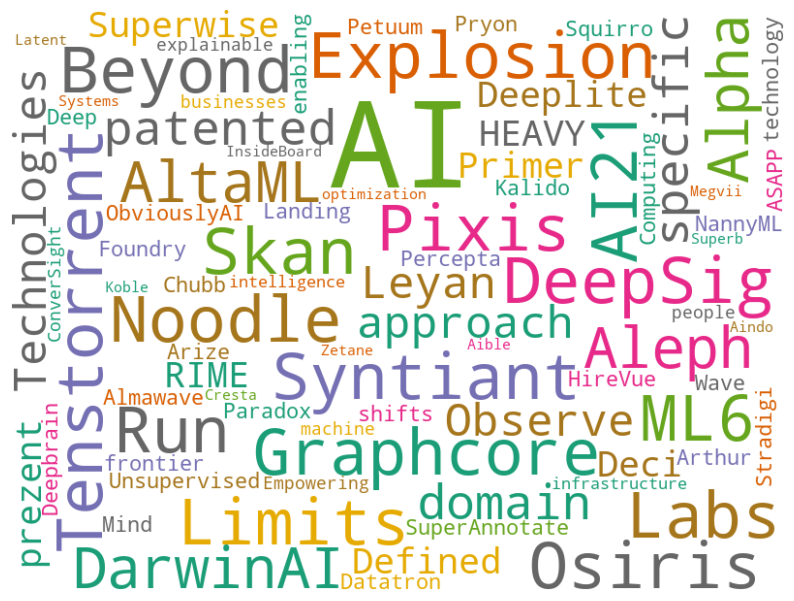

In [106]:
company_names = ' '.join(df_ml['company_name'])
wordcloud = WordCloud(width=800, height=600, background_color='white', max_font_size=125, colormap='Dark2') \
            .generate(company_names)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()